<a href="https://colab.research.google.com/github/iris-kurapaty/Introduction_to_DataAug_ERA9/blob/main/ERA_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/ERA V1/Assignment 9/src'

Mounted at /content/drive
/content/drive/My Drive/ERA V1/Assignment 9/src


In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchsummary import summary
from tqdm import tqdm
from model import *
from utils import *
from dataset import cifar10Dataset, get_loader
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
SEED = 1

# CUDA?
use_cuda = torch.cuda.is_available()
print("CUDA Available?", use_cuda)

# For reproducibility
torch.manual_seed(SEED)

if use_cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


In [4]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

train_transforms = A.Compose([
        A.HorizontalFlip(p=0.05),
        A.ShiftScaleRotate(scale_limit=0.1, rotate_limit=10),
        A.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)), #normalize
        A.CoarseDropout(max_holes = 1, max_height=16, max_width=16, min_holes = 1, min_height=16, min_width=16, fill_value=(0.4914, 0.4822, 0.4465), mask_fill_value =None),
        ToTensorV2()])

test_transforms = A.Compose([
        A.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)), #normalize
        ToTensorV2()])

In [5]:
train_data = cifar10Dataset('./data', train=True, download=True, transform=train_transforms) #
test_data = cifar10Dataset('./data', train=False, download=True, transform=test_transforms) #

Files already downloaded and verified
Files already downloaded and verified


In [6]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Dataloader Arguments & Test/Train Dataloaders


In [7]:
# train dataloader and test loader
batch_size = 128
train_loader, test_loader = get_loader(train_data, test_data, batch_size, use_cuda)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# Model Params



In [8]:
from model import Net

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
           Dropout-3           [-1, 32, 32, 32]               0
              ReLU-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
       BatchNorm2d-6           [-1, 32, 32, 32]              64
           Dropout-7           [-1, 32, 32, 32]               0
              ReLU-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 15, 15]           9,216
      BatchNorm2d-10           [-1, 32, 15, 15]              64
          Dropout-11           [-1, 32, 15, 15]               0
             ReLU-12           [-1, 32, 15, 15]               0
           Conv2d-13           [-1, 64, 15, 15]          18,432
      BatchNorm2d-14           [-1, 64,

# Training and Testing

In [9]:
train_losses_t = []
test_losses_t = []
train_acc_t = []
test_acc_t = []

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 80
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_losses, train_acc = train(model, device, train_loader, optimizer, epoch)
    train_losses_t += train_losses
    train_acc_t.append(train_acc)
    test_losses, test_acc = test(model, device, test_loader)
    test_losses_t += test_losses
    test_acc_t.append(test_acc)

EPOCH: 0


Loss=1.7101703882217407 Batch_id=390 Accuracy=34.51: 100%|██████████| 391/391 [00:14<00:00, 27.06it/s]



Test set: Average loss: 1.6358, Accuracy: 4064/10000 (40.64%)

EPOCH: 1


Loss=1.3112365007400513 Batch_id=390 Accuracy=49.37: 100%|██████████| 391/391 [00:13<00:00, 28.40it/s]



Test set: Average loss: 1.5723, Accuracy: 4896/10000 (48.96%)

EPOCH: 2


Loss=1.2950106859207153 Batch_id=390 Accuracy=55.50: 100%|██████████| 391/391 [00:13<00:00, 28.99it/s]



Test set: Average loss: 1.0481, Accuracy: 6264/10000 (62.64%)

EPOCH: 3


Loss=1.2240207195281982 Batch_id=390 Accuracy=59.58: 100%|██████████| 391/391 [00:13<00:00, 28.72it/s]



Test set: Average loss: 0.9426, Accuracy: 6670/10000 (66.70%)

EPOCH: 4


Loss=0.9245969653129578 Batch_id=390 Accuracy=62.66: 100%|██████████| 391/391 [00:13<00:00, 28.82it/s]



Test set: Average loss: 0.8276, Accuracy: 7079/10000 (70.79%)

EPOCH: 5


Loss=0.8867357969284058 Batch_id=390 Accuracy=64.85: 100%|██████████| 391/391 [00:13<00:00, 28.52it/s]



Test set: Average loss: 0.8271, Accuracy: 7143/10000 (71.43%)

EPOCH: 6


Loss=1.0071303844451904 Batch_id=390 Accuracy=66.32: 100%|██████████| 391/391 [00:13<00:00, 28.81it/s]



Test set: Average loss: 0.7833, Accuracy: 7207/10000 (72.07%)

EPOCH: 7


Loss=0.8416764140129089 Batch_id=390 Accuracy=67.52: 100%|██████████| 391/391 [00:13<00:00, 29.48it/s]



Test set: Average loss: 0.7136, Accuracy: 7522/10000 (75.22%)

EPOCH: 8


Loss=0.8188287615776062 Batch_id=390 Accuracy=68.78: 100%|██████████| 391/391 [00:13<00:00, 29.54it/s]



Test set: Average loss: 0.6856, Accuracy: 7647/10000 (76.47%)

EPOCH: 9


Loss=0.6272510290145874 Batch_id=390 Accuracy=69.91: 100%|██████████| 391/391 [00:12<00:00, 30.28it/s]



Test set: Average loss: 0.6457, Accuracy: 7811/10000 (78.11%)

EPOCH: 10


Loss=0.8562207221984863 Batch_id=390 Accuracy=70.57: 100%|██████████| 391/391 [00:12<00:00, 30.23it/s]



Test set: Average loss: 0.6767, Accuracy: 7689/10000 (76.89%)

EPOCH: 11


Loss=0.9448167085647583 Batch_id=390 Accuracy=71.26: 100%|██████████| 391/391 [00:13<00:00, 29.84it/s]



Test set: Average loss: 0.6263, Accuracy: 7807/10000 (78.07%)

EPOCH: 12


Loss=0.8362657427787781 Batch_id=390 Accuracy=71.90: 100%|██████████| 391/391 [00:13<00:00, 29.78it/s]



Test set: Average loss: 0.6078, Accuracy: 7910/10000 (79.10%)

EPOCH: 13


Loss=0.7553839683532715 Batch_id=390 Accuracy=72.68: 100%|██████████| 391/391 [00:13<00:00, 29.82it/s]



Test set: Average loss: 0.6121, Accuracy: 7908/10000 (79.08%)

EPOCH: 14


Loss=1.0138776302337646 Batch_id=390 Accuracy=72.89: 100%|██████████| 391/391 [00:13<00:00, 29.74it/s]



Test set: Average loss: 0.5852, Accuracy: 8009/10000 (80.09%)

EPOCH: 15


Loss=0.9271467328071594 Batch_id=390 Accuracy=73.51: 100%|██████████| 391/391 [00:13<00:00, 29.62it/s]



Test set: Average loss: 0.5878, Accuracy: 7987/10000 (79.87%)

EPOCH: 16


Loss=0.5518847703933716 Batch_id=390 Accuracy=73.90: 100%|██████████| 391/391 [00:12<00:00, 30.27it/s]



Test set: Average loss: 0.5461, Accuracy: 8130/10000 (81.30%)

EPOCH: 17


Loss=0.8282788395881653 Batch_id=390 Accuracy=74.30: 100%|██████████| 391/391 [00:12<00:00, 30.16it/s]



Test set: Average loss: 0.5779, Accuracy: 8038/10000 (80.38%)

EPOCH: 18


Loss=0.8610666394233704 Batch_id=390 Accuracy=74.65: 100%|██████████| 391/391 [00:12<00:00, 30.10it/s]



Test set: Average loss: 0.5402, Accuracy: 8179/10000 (81.79%)

EPOCH: 19


Loss=0.7744356989860535 Batch_id=390 Accuracy=74.91: 100%|██████████| 391/391 [00:12<00:00, 30.25it/s]



Test set: Average loss: 0.5503, Accuracy: 8122/10000 (81.22%)

EPOCH: 20


Loss=0.7739483714103699 Batch_id=390 Accuracy=75.35: 100%|██████████| 391/391 [00:12<00:00, 30.33it/s]



Test set: Average loss: 0.5553, Accuracy: 8128/10000 (81.28%)

EPOCH: 21


Loss=0.8646346926689148 Batch_id=390 Accuracy=75.38: 100%|██████████| 391/391 [00:12<00:00, 30.67it/s]



Test set: Average loss: 0.5620, Accuracy: 8078/10000 (80.78%)

EPOCH: 22


Loss=0.6194319128990173 Batch_id=390 Accuracy=75.57: 100%|██████████| 391/391 [00:12<00:00, 30.19it/s]



Test set: Average loss: 0.5001, Accuracy: 8323/10000 (83.23%)

EPOCH: 23


Loss=0.6211122274398804 Batch_id=390 Accuracy=75.93: 100%|██████████| 391/391 [00:12<00:00, 30.55it/s]



Test set: Average loss: 0.5398, Accuracy: 8197/10000 (81.97%)

EPOCH: 24


Loss=0.7509322166442871 Batch_id=390 Accuracy=76.59: 100%|██████████| 391/391 [00:12<00:00, 30.52it/s]



Test set: Average loss: 0.5029, Accuracy: 8282/10000 (82.82%)

EPOCH: 25


Loss=0.7476449012756348 Batch_id=390 Accuracy=76.35: 100%|██████████| 391/391 [00:12<00:00, 30.27it/s]



Test set: Average loss: 0.5226, Accuracy: 8258/10000 (82.58%)

EPOCH: 26


Loss=0.5635084509849548 Batch_id=390 Accuracy=76.61: 100%|██████████| 391/391 [00:12<00:00, 30.25it/s]



Test set: Average loss: 0.5129, Accuracy: 8271/10000 (82.71%)

EPOCH: 27


Loss=0.5842201709747314 Batch_id=390 Accuracy=76.95: 100%|██████████| 391/391 [00:13<00:00, 29.68it/s]



Test set: Average loss: 0.4888, Accuracy: 8379/10000 (83.79%)

EPOCH: 28


Loss=0.6287113428115845 Batch_id=390 Accuracy=77.19: 100%|██████████| 391/391 [00:13<00:00, 29.59it/s]



Test set: Average loss: 0.5134, Accuracy: 8267/10000 (82.67%)

EPOCH: 29


Loss=0.8542994260787964 Batch_id=390 Accuracy=77.42: 100%|██████████| 391/391 [00:13<00:00, 29.26it/s]



Test set: Average loss: 0.4919, Accuracy: 8351/10000 (83.51%)

EPOCH: 30


Loss=0.7167150974273682 Batch_id=390 Accuracy=77.44: 100%|██████████| 391/391 [00:13<00:00, 29.69it/s]



Test set: Average loss: 0.5146, Accuracy: 8248/10000 (82.48%)

EPOCH: 31


Loss=0.6717972159385681 Batch_id=390 Accuracy=77.51: 100%|██████████| 391/391 [00:13<00:00, 29.81it/s]



Test set: Average loss: 0.4830, Accuracy: 8368/10000 (83.68%)

EPOCH: 32


Loss=0.7642273306846619 Batch_id=390 Accuracy=78.03: 100%|██████████| 391/391 [00:13<00:00, 29.43it/s]



Test set: Average loss: 0.4837, Accuracy: 8370/10000 (83.70%)

EPOCH: 33


Loss=0.6105084419250488 Batch_id=390 Accuracy=77.72: 100%|██████████| 391/391 [00:13<00:00, 29.32it/s]



Test set: Average loss: 0.4899, Accuracy: 8336/10000 (83.36%)

EPOCH: 34


Loss=0.6228681802749634 Batch_id=390 Accuracy=77.89: 100%|██████████| 391/391 [00:13<00:00, 29.58it/s]



Test set: Average loss: 0.4869, Accuracy: 8347/10000 (83.47%)

EPOCH: 35


Loss=0.8349639177322388 Batch_id=390 Accuracy=78.08: 100%|██████████| 391/391 [00:13<00:00, 29.82it/s]



Test set: Average loss: 0.4795, Accuracy: 8365/10000 (83.65%)

EPOCH: 36


Loss=0.636282742023468 Batch_id=390 Accuracy=78.31: 100%|██████████| 391/391 [00:13<00:00, 29.00it/s]



Test set: Average loss: 0.4795, Accuracy: 8380/10000 (83.80%)

EPOCH: 37


Loss=0.5751954317092896 Batch_id=390 Accuracy=78.53: 100%|██████████| 391/391 [00:13<00:00, 29.43it/s]



Test set: Average loss: 0.4568, Accuracy: 8494/10000 (84.94%)

EPOCH: 38


Loss=0.6134447455406189 Batch_id=390 Accuracy=78.81: 100%|██████████| 391/391 [00:13<00:00, 29.67it/s]



Test set: Average loss: 0.4892, Accuracy: 8358/10000 (83.58%)

EPOCH: 39


Loss=0.6035736799240112 Batch_id=390 Accuracy=78.72: 100%|██████████| 391/391 [00:13<00:00, 29.92it/s]



Test set: Average loss: 0.4701, Accuracy: 8413/10000 (84.13%)

EPOCH: 40


Loss=0.46085324883461 Batch_id=390 Accuracy=78.91: 100%|██████████| 391/391 [00:13<00:00, 29.08it/s]



Test set: Average loss: 0.4470, Accuracy: 8511/10000 (85.11%)

EPOCH: 41


Loss=0.7580799460411072 Batch_id=390 Accuracy=79.02: 100%|██████████| 391/391 [00:13<00:00, 29.53it/s]



Test set: Average loss: 0.4460, Accuracy: 8491/10000 (84.91%)

EPOCH: 42


Loss=0.7205116748809814 Batch_id=390 Accuracy=79.29: 100%|██████████| 391/391 [00:13<00:00, 29.46it/s]



Test set: Average loss: 0.4484, Accuracy: 8502/10000 (85.02%)

EPOCH: 43


Loss=0.6048579216003418 Batch_id=390 Accuracy=79.24: 100%|██████████| 391/391 [00:13<00:00, 29.95it/s]



Test set: Average loss: 0.4544, Accuracy: 8464/10000 (84.64%)

EPOCH: 44


Loss=0.8007599711418152 Batch_id=390 Accuracy=79.42: 100%|██████████| 391/391 [00:13<00:00, 29.39it/s]



Test set: Average loss: 0.4656, Accuracy: 8429/10000 (84.29%)

EPOCH: 45


Loss=0.6037489771842957 Batch_id=390 Accuracy=79.50: 100%|██████████| 391/391 [00:12<00:00, 30.43it/s]



Test set: Average loss: 0.4289, Accuracy: 8554/10000 (85.54%)

EPOCH: 46


Loss=0.6083946824073792 Batch_id=390 Accuracy=79.67: 100%|██████████| 391/391 [00:13<00:00, 29.91it/s]



Test set: Average loss: 0.4484, Accuracy: 8496/10000 (84.96%)

EPOCH: 47


Loss=0.5572868585586548 Batch_id=390 Accuracy=79.81: 100%|██████████| 391/391 [00:13<00:00, 29.73it/s]



Test set: Average loss: 0.4374, Accuracy: 8533/10000 (85.33%)

EPOCH: 48


Loss=0.5193524956703186 Batch_id=390 Accuracy=79.73: 100%|██████████| 391/391 [00:13<00:00, 29.20it/s]



Test set: Average loss: 0.4474, Accuracy: 8513/10000 (85.13%)

EPOCH: 49


Loss=0.6054325699806213 Batch_id=390 Accuracy=79.92: 100%|██████████| 391/391 [00:13<00:00, 29.75it/s]



Test set: Average loss: 0.4316, Accuracy: 8564/10000 (85.64%)

EPOCH: 50


Loss=0.6609671711921692 Batch_id=390 Accuracy=79.80: 100%|██████████| 391/391 [00:13<00:00, 29.43it/s]



Test set: Average loss: 0.4481, Accuracy: 8519/10000 (85.19%)

EPOCH: 51


Loss=0.6022249460220337 Batch_id=390 Accuracy=80.04: 100%|██████████| 391/391 [00:13<00:00, 29.75it/s]



Test set: Average loss: 0.4463, Accuracy: 8495/10000 (84.95%)

EPOCH: 52


Loss=0.5374240279197693 Batch_id=390 Accuracy=79.95: 100%|██████████| 391/391 [00:13<00:00, 29.06it/s]



Test set: Average loss: 0.4335, Accuracy: 8540/10000 (85.40%)

EPOCH: 53


Loss=0.6347672939300537 Batch_id=390 Accuracy=80.25: 100%|██████████| 391/391 [00:13<00:00, 28.70it/s]



Test set: Average loss: 0.4291, Accuracy: 8536/10000 (85.36%)

EPOCH: 54


Loss=0.666655421257019 Batch_id=390 Accuracy=80.41: 100%|██████████| 391/391 [00:13<00:00, 28.36it/s]



Test set: Average loss: 0.4195, Accuracy: 8614/10000 (86.14%)

EPOCH: 55


Loss=0.6467334032058716 Batch_id=390 Accuracy=80.20: 100%|██████████| 391/391 [00:13<00:00, 28.97it/s]



Test set: Average loss: 0.4284, Accuracy: 8544/10000 (85.44%)

EPOCH: 56


Loss=0.5470905303955078 Batch_id=293 Accuracy=80.46:  75%|███████▌  | 294/391 [00:09<00:03, 30.95it/s]


KeyboardInterrupt: ignored

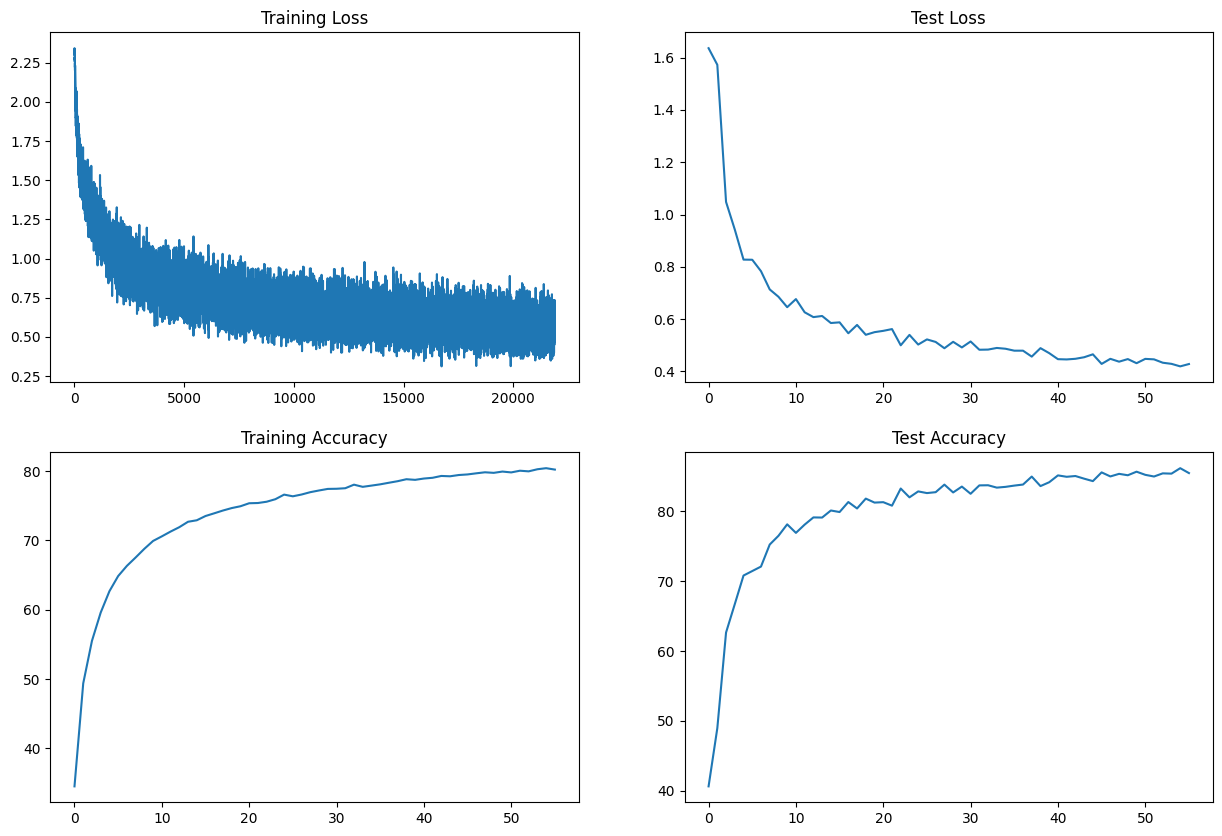

In [10]:
plot_loss_acc(train_losses_t, train_acc_t, test_losses_t, test_acc_t)